In [215]:
import re
import pandas as pd

LOG_PATH = '../data/logfiles.log'
LOG_PATTERN = r'(?P<ip>\S+) - - \[(?P<time>[^\]]+)\] "(?P<method>\S+) (?P<endpoint>\S+) HTTP/\d\.\d" (?P<status>\d+) (?P<bytes>\d+) "(?P<referrer>[^"]+)" "(?P<ua>[^"]+)" (?P<response_time>\d+)'

def drop_data(df):
    """
    Drop unnesscary data
    
    It's all the same
    """
    return df.drop(["time", "referrer"], axis=1)

def parse_logs(path):
    data = []
    with open(path) as f:
        for line in f:
            match = re.match(LOG_PATTERN, line)
            if match:
                data.append(match.groupdict())
    
    return drop_data(pd.DataFrame(data))

df = parse_logs(LOG_PATH)
df.head()


,ip,method,endpoint,status,bytes,ua,response_time
0,78.227.234.134,GET,/usr,304,4944,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3)...,713
1,8.108.176.251,DELETE,/usr,303,5350,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000)...,1906
2,3.173.150.154,GET,/usr/register,404,4835,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000)...,3680
3,116.115.120.25,PUT,/usr,200,4240,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2788
4,160.26.158.113,PUT,/usr/admin,404,5436,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,793


In [216]:
from user_agents import parse
method_map = {
    "GET": 0,
    "DELETE": 1,
    "PUT": 2,
    "POST": 3
}
method_map2 = {
    "/usr": 0,
    "/usr/register": 1,
    "/usr/admin": 2,
    "/usr/admin/developer": 3,
    "/usr/login": 4
}
ua_parsed = df["ua"].apply(parse)
df["os"] = ua_parsed.apply(lambda x: x.os.family)
df["device"] = ua_parsed.apply(lambda x: x.device.family)
df["browser"] = ua_parsed.apply(lambda x: x.browser.family)
df["request_type_dummy"] = df["method"].map(method_map)
df["endpoint_dummy"] = df["endpoint"].map(method_map2)
df["status"] = df["status"].astype(int)
df["is_error"] = (df["status"] >= 400).astype(int)

In [217]:
os_dummies = pd.get_dummies(df['os'], prefix='os', drop_first=True).astype(int)
device_dummies = pd.get_dummies(df['device'], prefix='d', drop_first=True).astype(int)
browser_dummies = pd.get_dummies(df['browser'], prefix='b', drop_first=True).astype(int)


In [218]:
df

,ip,method,endpoint,status,bytes,ua,response_time,os,device,browser,request_type_dummy,endpoint_dummy,is_error
0,78.227.234.134,GET,/usr,304,4944,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3)...,713,Mac OS X,Mac,Safari,0,0,0
1,8.108.176.251,DELETE,/usr,303,5350,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000)...,1906,Android,OnePlus ONEPLUS A6000,Chrome Mobile,1,0,0
2,3.173.150.154,GET,/usr/register,404,4835,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000)...,3680,Android,OnePlus ONEPLUS A6000,Chrome Mobile,0,1,1
3,116.115.120.25,PUT,/usr,200,4240,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2788,Windows,Other,Opera,2,0,0
4,160.26.158.113,PUT,/usr/admin,404,5436,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,793,Windows,Other,Opera,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,176.113.252.35,GET,/usr/admin/developer,403,4953,Mozilla/5.0 (Linux; Android 10; ONEPLUS A6000)...,2787,Android,OnePlus ONEPLUS A6000,Chrome Mobile,0,3,1
9996,81.8.116.146,POST,/usr/register,404,4833,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,3020,Windows,Other,Chrome,3,1,1
9997,99.46.31.81,DELETE,/usr/login,500,4067,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,1004,Windows,Other,Opera,1,4,1
9998,120.158.148.193,DELETE,/usr/admin/developer,403,4680,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2540,Windows,Other,Opera,1,3,1


In [219]:
5000//11

454

In [ ]:
import random
import numpy as np
def data_set_creation(df):
    random.seed(42)
    np.random.seed(42)
    df = pd.concat([df, os_dummies, device_dummies, browser_dummies], axis=1)

    df["response_time"] = (
    df["bytes"].astype(int) // 11 +
    df["request_type_dummy"].astype(int) * np.random.normal(25, 25, len(df)) +
    df["endpoint_dummy"].astype(int) * 15 +
    df["os_Mac OS X"] * np.random.normal(80, 10, len(df)) +
    df["os_Windows"] * np.random.normal(90, 10, len(df)) +
    
    df["d_Mac"] * np.random.normal(100, 15, len(df)) +
    df["d_iPhone"] * np.random.normal(120, 20, len(df)) +
    df["d_Other"] * -np.random.normal(160, 20, len(df)) +

    df["b_Chrome Mobile"] * np.random.normal(75, 15, len(df)) +
    df["b_Edge"] * np.random.normal(195, 25, len(df)) +
    df["b_Edge Mobile"] * -np.random.normal(165, 25, len(df)) +
    df["b_Opera"] * np.random.normal(90, 15, len(df)) +
    df["b_Safari"] * np.random.normal(110, 20, len(df)) +
    
    df["b_Opera Mobile"] * -90 +
    df["request_type_dummy"].astype(int)*df["endpoint_dummy"].astype(int)*25 + 
    np.random.normal(0, 100, len(df))  # extra general noise
    )
        
    return df

In [252]:
new_data = data_set_creation(df)

In [253]:
new_data.columns

Index(['ip', 'method', 'endpoint', 'status', 'bytes', 'ua', 'response_time',
       'os', 'device', 'browser', 'request_type_dummy', 'endpoint_dummy',
       'is_error', 'os_Mac OS X', 'os_Windows', 'os_iOS', 'd_Mac',
       'd_OnePlus ONEPLUS A6000', 'd_Other', 'd_iPhone', 'b_Chrome Mobile',
       'b_Edge', 'b_Edge Mobile', 'b_Firefox', 'b_Firefox Mobile',
       'b_Mobile Safari', 'b_Opera', 'b_Opera Mobile', 'b_Safari'],
      dtype='object')

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


X = new_data[["bytes", "request_type_dummy", "endpoint_dummy"]]
y = new_data["response_time"]
X = pd.concat([X, os_dummies, browser_dummies, device_dummies], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(max_depth=4, random_state=0)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)



In [255]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
print(f"MAE:  {mean_absolute_error(y_test, y_pred):.2f}")
print(f"MSE:  {mean_squared_error(y_test, y_pred):.2f}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred):.2f}")
print(f"R²:   {r2_score(y_test, y_pred):.2f}")


MAE:  114.14
MSE:  20622.52
RMSE: 143.61
R²:   0.53


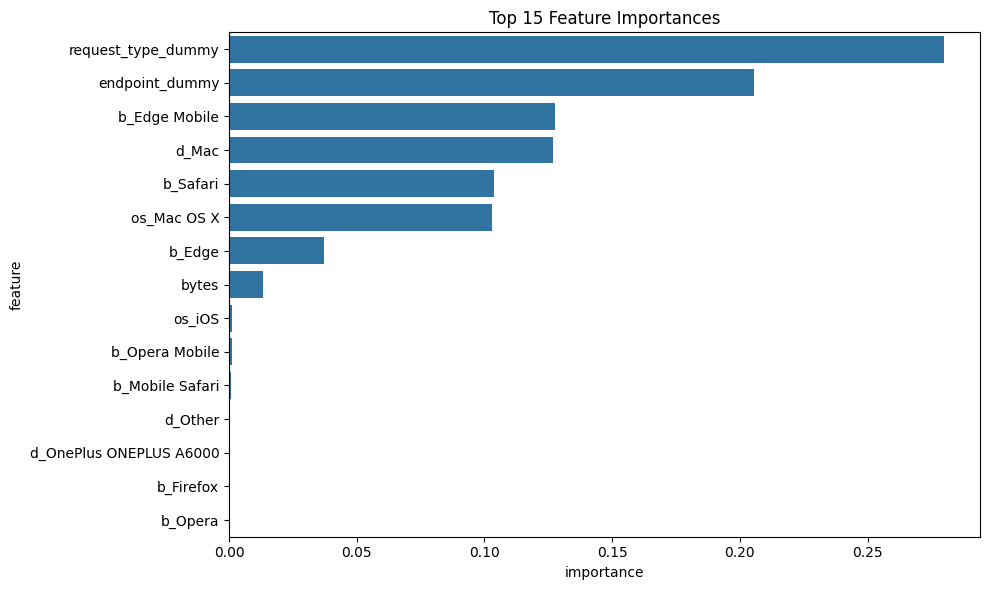

In [256]:
importances = model.feature_importances_
feature_names = X.columns

# Sort and visualize
feat_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df.head(15), x='importance', y='feature')
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()
